In [17]:
import numpy as np
import pandas as pd
from glob import glob
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

In [5]:
flist = glob('./rawfiles/*csv')
dfs= Parallel(n_jobs=2)(delayed(pd.read_csv)(i) for i in flist)

In [6]:
df = pd.concat(dfs)

In [7]:
df['DATETIME'] = df['DATE'].astype(str) + ' ' + df['TIME']

In [8]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

In [9]:
df = df[['DATETIME','PRICE','SIZE']]
df['PRICE'] = df['PRICE'].astype(np.float32)
df['SIZE'] = df['PRICE'].astype(int)

In [11]:
df = df.sort_values(by='DATETIME').reset_index().drop('index',axis=1)

In [ ]:
df = df.drop(df[df.PRICE>5000].index)

In [15]:
hourly=df.resample('H', on='DATETIME').median()
hourly.to_pickle('AMZN_hourly.pickle')

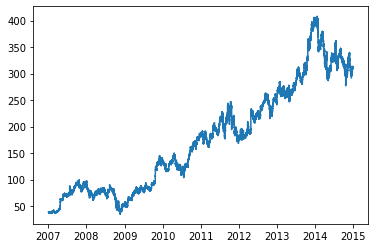

In [18]:
plt.plot(hourly.index, hourly.PRICE)

In [ ]:
df.to_pickle('AMZN_2007_2014.pickle')